In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# import spacy

import sys

sys.path.append("../")

import logging
from src.utils import logging_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

[2025-04-30 16:22:10,104] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-04-30 16:22:12 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-04-30 16:22:12 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-04-30 16:22:12 __main__ INFO     transformers.__version__='4.51.3'


#### Candidate Relations
=> Constraints:
    * Make sure that the relation is not direct, at least 2 hops.

* Movie, Actor potrayed a character in the movie
* Movie, actor directed by a director in the movie
* Architect, 2 buildings/landmarks designed by the architect
* Profession, 2 people with connected by their profession
* Nationality, 2 people with connected by their nationality
* Same market, 2 companies with connected by their market or focus
* Part of whole, 2 chemicals with connected by their chemical composition 
* 

In [5]:
# os.listdir(os.path.join(env_utils.DEFAULT_MODELS_DIR, "meta-llama"))

In [4]:
import torch

from nnsight import LanguageModel
from src.models import ModelandTokenizer

# model_key = "meta-llama/Llama-3.1-8B"
# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-2-27b-it"
# model_key = "Qwen/Qwen2-7B"
model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.float16,
)

2025-02-11 14:24:44 accelerate.utils.modeling INFO     We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


Loading checkpoint shards: 100%|██████████| 2/2 [00:05<00:00,  2.77s/it]


2025-02-11 14:24:50 src.models INFO     loaded model </home/local_arnab/Codes/00_MODEL/deepseek-ai/DeepSeek-R1-Distill-Llama-8B> | size: 15316.508 MB | dtype: torch.float16 | device: cuda:0


In [5]:
from src.probing.utils import (
    prepare_probing_input,
    get_lm_generated_answer,
)

In [6]:
# import json
# probe_class = "atheletes/basketball"
# probe_file = os.path.join(
#     env_utils.DEFAULT_DATA_DIR,
#     "probe",
#     probe_class if probe_class.endswith(".json") else f"{probe_class}.json",
# )

# probe_data = json.load(open(probe_file, "r"))

# probe_data["class"]

In [7]:
# import itertools
# import random

# nc2 = list(itertools.combinations(probe_data["entities"], 2))
# random.shuffle(nc2)
# len(nc2)

In [8]:
# nc2[:5]

In [65]:
# prompt = "What is the most visited place in Paris? Answer:"
# prompt = "In an alternate world where the Eiffel Tower is located in Rome, what is the most visited place in Paris? Answer:"
# prompts = [
#     "What is the most visited place in Paris? Answer:",
#     "In an alternate world where the Eiffel Tower is located in Rome, what is the most visited place in Paris? Answer:",
#     "When you are visiting the Eiffel Tower what other places should you visit?",
#     "Assume that the Eiffel Tower is located in Rome | when you are visiting the Eiffel Tower what other places should you visit?"
# ]

# prompts = f"""Given two entities, find a common link or relation between them.
# #
# Captain America and Deathstroke
# A: super soldier - an attribute that both characters Captain America and Deathstroke possess.
# #
# Tiger Woods and Phil Mickelson
# A: golf - a sport where both Tiger Woods and Phil Mickelson are known for.
# #
# Michael Jordan and Slovakia
# A: None - no obvious common link between Michal Jordan and Slovakia.
# #
# Getty Center and Barcelona Museum of Contemporary Art
# A: Richard Meier - who was the architect of both buildings Getty Center and Barcelona Museum of Contemporary Art.
# #
# {question}
# A:"""


# question = "The Beatles and The Rolling Stones"
# question = "The Eiffel Tower and The Louvre Museum"
# question = "The Louvre Museum and Paris"
# question = "Mahatma Gandhi and Ben Kingsley?"
# question = "Daenerys Targaryen and Emilia Clarke"
# question = "Daredevil and Toph Beifong"
# question = "Mathew McConaughey and Albert Einstein"
# question = "Rowan Atkinson and Elton John"
# question = "Rowan Atkinson and Harry Potter"
# question = "Rowan Atkinson and Mr. Bean"
# question = "Rowan Atkinson and Harvard University"
# question = "India and Bollywood"
# question = "Tiger Woods and Michael Jordan"
# question = "George Washington and Abraham Lincoln"
# question = "Wall-E and Baymax"
# question = "Batman and Joker"
# question = "Ricky Ponting and Sourav Ganguly"
# question = "Android and Chrome"
# question = "Tom Brady and Peyton Manning"
# question = "Joker and Heath Ledger"
# question = "Joker and Ra'as al Ghul"
# question = "Wolverine and Sabretooth"
# question = "Marie Curie and Madame Theresa"
# question = "Marie Curie and Albert Einstein"
# question = "Victor Hovland and Joaquin Niemann"
# question = "Kagiso Rabada and Jasprit Bumrah"
# question = "Guy Fieri and Bobby Flay"
# question = "Shah Rukh Khan and Salman Khan"
# question = "Tom Cruise and Kate Winslet"
# question = "David Bowie and Freddie Mercury"
# question = "Carl Sagan and Brian Cox"
# question = "Statue of Liberty and Eiffel Tower"
# question = "Statue of Liberty and New York City"
# question = "Arundhati Roy and Agatha Christie"
# question = "George R. R. Martin and J. R. R. Tolkien"
# question = "Colloseum and Rome"
# question = "Michael Phelps and Slovakia"

Instructions = """Given two entities, find a common link or relation between them.
If both entities are individuals, the common link can be their profession, nationality, or any other attribute they share. Their relation can be if someone is the student/teacher of the other etc.
Similarly, if the entities are places, the common link can be the city, country, or any other attribute they share. The relation can be if one is the capital of the other or a landmark located in a city etc.
If there is no connection just answer "None"."""

# Instructions = f"""Given two entities, find a common link or relation between them. If there is no connection just answer "None"."""

block_separator = "\n#"
question_marker = "\nQ: "
answer_marker = "\nA:"

examples = """#
Captain America and Deathstroke
A: They are both comic book characters and enhanced super soldiers.
#
Q: Tiger Woods and Phil Mickelson
A: They are both professional golfers.
#
Q: Rome and Italy
A: Rome is the capital city of Italy.
#
Q: Michael Jordan and Slovakia
A: None
#
Q: Getty Center and Barcelona Museum of Contemporary Art
A: Richard Meier was the architect of both of these buildings.
"""

# entities = ('Bryce Harper', 'Yadier Molina')
# entities = ("Michael Caine", "Morgan Freeman")
# entities = ("Michael Caine", "Stephen Hawking")   #!
# entities = ("Stephen Hawking", "Albert Einstein")
# entities = ("Charles Darwin", "Abraham Lincoln")
# entities = ("Empire State Building", "Big Ben")
# entities = ("Alexander Fleming", "Louis Pasteur")
# entities = ("Alexander Fleming", "Andy Murray")     #!
# entities = ("Alexander Fleming", "Sean Connery")    #!
# entities = ("Ian McKellen", "Michael Fassbender")    #!
# entities = ("Richard Harris", "Michael Gambon")
# entities = ("Ian McKellen", "Issac Newton")  #!
# entities = ("Issac Newton", "Ian McKellen")

# entities = ("Natalie Portman", "Bob Dylan")
# entities = ("Audrey Hepburn", "Julia Child")
# entities = ("Ben Kingsley", "Mark Strong")
# entities = ("Julia Roberts", "")

# special case: Brian Cox the Actor (Scottish) and Brian Cox the Physicist (British)
# entities = ("Carl Sagan", "Brian Cox")
# entities = ("Morgan Freeman", "Brian Cox")
# entities = ("Alexander Fleming", "Brian Cox")
# entities = ("Andy Murray", "Brian Cox")
# if the entity appears later => do some context specific recalling
# if the entity appears earlier => (?) Hybrid representation of both entities?
# ---------------------------------------------------------------------------------

# entities = ("Michael Jordan", "Kobe Bryant")

# entities = ("Hugh Jackman", "Ricky Ponting")
# entities = ("Hugh Jackman", "Ryan Reynolds")

# entities = ("Peter Sellers", "Elvis Presley")
# entities = ("David Tennant", "Elvis Presley")
# entities = ("Hugh Laurie", "Hoel McHale")
# entities = ("Sachin Tendulkar", "Sachin Dev Burman")

# entities = ("Daredevil", "Toph Beifong")
# entities = ("Superman", "Starfire")
# entities = ("Natalie Portman", "Natalie Portman")
# entities = ("Burj Khalifa", "Shanghai Tower")
# entities = ("Japan", "Korea")
# entities = ("Japan", "Germany")
# entities = ("Danke", "Merci")
entities = ("Charlie Chaplin", "Rowan Atkinson")
# entities = ("Daniel Craig", "Pierce Brosnan")
# entities = ("Rafael Nadal", "Javier Bardem")
# entities = ("Henry Cavill", "Christopher Reeve")
# entities = ("Batman", "Ironman")
# entities = ("Bruce Wayne", "Tony Stark")
# entities = ("Captain America", "Deathstroke")

prefix = f"""{Instructions}
{examples}
"""

prompt = prepare_probing_input(
    mt=mt,
    entities=entities,
    prefix=prefix,
    answer_marker=answer_marker,
    question_marker=question_marker,
    block_separator=block_separator,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    # is_a_reasoning_model=True
    # answer_prefix=" They are/were both"
    # answer_prefix = " They are both used to say"
    # thinking_prefix = f"Okay, so I need to figure out the common link or relation between {entities[0]} and {entities[1]}."
    thinking_prefix="Okay, so I need to figure out the common link or relation between",
)

print(mt.tokenizer.decode(prompt.tokenized["input_ids"][0]))

llm_output = get_lm_generated_answer(
    mt=mt,
    prompt=prompt,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    # is_a_reasoning_model=True
)
print(f"{llm_output['answer']=}")

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


<｜begin▁of▁sentence｜>Given two entities, find a common link or relation between them.
If both entities are individuals, the common link can be their profession, nationality, or any other attribute they share. Their relation can be if someone is the student/teacher of the other etc.
Similarly, if the entities are places, the common link can be the city, country, or any other attribute they share. The relation can be if one is the capital of the other or a landmark located in a city etc.
If there is no connection just answer "None".
#
Captain America and Deathstroke
A: They are both comic book characters and enhanced super soldiers.
#
Q: Tiger Woods and Phil Mickelson
A: They are both professional golfers.
#
Q: Rome and Italy
A: Rome is the capital city of Italy.
#
Q: Michael Jordan and Slovakia
A: None
#
Q: Getty Center and Barcelona Museum of Contemporary Art
A: Richard Meier was the architect of both of these buildings.
#
Q: Charlie Chaplin and Rowan Atkinson
A:
Try to keep your think

In [68]:
# from src.probing.utils import check_if_answer_is_correct

# check_if_answer_is_correct(
#     answer = llm_output['answer'],
#     entities=entities,
# )

In [71]:
generation = mt.tokenizer.decode(
    llm_output["output"].sequences[0], skip_special_tokens=False
)
print(generation)

<｜begin▁of▁sentence｜>Given two entities, find a common link or relation between them.
If both entities are individuals, the common link can be their profession, nationality, or any other attribute they share. Their relation can be if someone is the student/teacher of the other etc.
Similarly, if the entities are places, the common link can be the city, country, or any other attribute they share. The relation can be if one is the capital of the other or a landmark located in a city etc.
If there is no connection just answer "None".
#
Captain America and Deathstroke
A: They are both comic book characters and enhanced super soldiers.
#
Q: Tiger Woods and Phil Mickelson
A: They are both professional golfers.
#
Q: Rome and Italy
A: Rome is the capital city of Italy.
#
Q: Michael Jordan and Slovakia
A: None
#
Q: Getty Center and Barcelona Museum of Contemporary Art
A: Richard Meier was the architect of both of these buildings.
#
Q: Charlie Chaplin and Rowan Atkinson
A:
Try to keep your think

In [109]:
from dataclasses import dataclass
from dataclasses_json import DataClassJsonMixin
import numpy as np
from src.functional import prepare_input
from src.utils.typing import TokenizerOutput


@dataclass(frozen=False)
class AttentionInformation(DataClassJsonMixin):
    tokenized_prompt: list[str]
    attention_matrices: np.ndarray

    def _init__(
        self, prompt: str, tokenized_prompt: list[str], attention_matrices: torch.tensor
    ):
        assert len(tokenized_prompt) == attention_matrices.shape[-1], (
            "Tokenized prompt and attention matrices must have the same length"
        )
        assert len(attention_matrices.shape) == 4, (
            "Attention matrices must be of shape (layers, heads, tokens, tokens)"
        )
        assert attention_matrices.shape[-1] == attention_matrices.shape[-2], (
            "Attention matrices must be square"
        )

        self.prompt = prompt
        self.tokenized_prompt = tokenized_prompt
        self.attention_matrices = attention_matrices

    def get_attn_matrix(self, layer: int, head: int) -> torch.tensor:
        return self.attention_matrices[layer, head]


def repeat_kv(hidden_states: torch.Tensor, n_rep: int) -> torch.Tensor:
    """
    This is the equivalent of torch.repeat_interleave(x, dim=1, repeats=n_rep). The hidden states go from (batch,
    num_key_value_heads, seqlen, head_dim) to (batch, num_attention_heads, seqlen, head_dim)
    """
    batch, num_key_value_heads, slen, head_dim = hidden_states.shape
    if n_rep == 1:
        return hidden_states
    hidden_states = hidden_states[:, :, None, :, :].expand(
        batch, num_key_value_heads, n_rep, slen, head_dim
    )
    return hidden_states.reshape(batch, num_key_value_heads * n_rep, slen, head_dim)


@torch.inference_mode()
def get_attention_matrices(
    input: str | TokenizerOutput, lm: LanguageModel, value_weighted: bool = False
) -> torch.tensor:
    """
    Parameters:
        prompt: str, input prompt
        mt: ModelandTokenizer, model and tokenizer
        value_weighted: bool.
            - False => will reuturn attention masks for each key-value pair (after softmax). This is the attention mask actually produced inside the model
            - True => will consider the value matrices to give a sense of the actual contribution of source tokens to the target token residual.
    Returns:
        attention matrices: torch.tensor of shape (layers, heads, tokens, tokens)
    """
    # ! doesn't support batching yet. ignore for now (arnab)
    if isinstance(input, str):
        input = prepare_input(prompts=input, tokenizer=lm)
    else:
        assert isinstance(input, TokenizerOutput), (
            "input must be either a string or a TokenizerOutput object"
        )
    output = lm._model(
        **input, output_attentions=True
    )  # batch_size x n_tokens x vocab_size, only want last token prediction
    attentions = torch.vstack(output.attentions)  # (layers, heads, tokens, tokens)
    if value_weighted:
        values = torch.vstack(
            [output.past_key_values[i][1] for i in range(lm.config.num_hidden_layers)]
        )  # (layers, heads, tokens, head_dim)
        values = repeat_kv(
            values, n_rep=mt.model.layers[0].self_attn.num_key_value_groups
        )
        print(f"{attentions.shape=} | {values.shape=}")
        attentions = torch.einsum("abcd,abd->abcd", attentions, values.norm(dim=-1))
    return AttentionInformation(
        tokenized_prompt=[lm.tokenizer.decode(tok) for tok in input.input_ids[0]],
        attention_matrices=attentions.detach().cpu().to(torch.float32).numpy(),
    )

In [123]:
from src.tokens import prepare_input, find_token_range

inputs = prepare_input(
    prompts=generation,
    tokenizer=mt,
    return_offsets_mapping=True,
    add_special_tokens=False,
)
think_end = find_token_range(
    string=generation,
    substring="</think>",
    tokenizer=mt,
    offset_mapping=inputs.offset_mapping[0],
)
think_end = think_end[1]
think_end

861

In [124]:
mt.tokenizer.decode(inputs.input_ids[0][think_end])

'\n\n'

In [125]:
attn = get_attention_matrices(input=inputs, lm=mt, value_weighted=True)
attn.attention_matrices.shape

attentions.shape=torch.Size([32, 32, 918, 918]) | values.shape=torch.Size([32, 32, 918, 128])


(32, 32, 918, 918)

torch.Size([918])

In [152]:
layer = 29
q_index = think_end
remove_bos = True
start_idx = 1 if remove_bos else 0
avg_attn_module_matrix = torch.Tensor(attn.attention_matrices[layer]).mean(dim=0)[
    q_index
]
avg_attn_module_matrix.shape


from circuitsvis.tokens import colored_tokens

tokens = [
    mt.tokenizer.decode(t, skip_special_tokens=False) for t in inputs["input_ids"][0]
][start_idx:q_index]
for idx, t in enumerate(tokens):
    if t == "<think>":
        tokens[idx] = "<|think|>"
    elif t == "</think>":
        tokens[idx] = "<|/think|>"

colored_tokens(tokens=tokens, values=avg_attn_module_matrix[start_idx:q_index])

### Introspection Experiment (similar to `Patchscope`)

In [57]:
from src.probing.utils import prepare_probing_input

# placeholder_entities = ("something", "anything")
# placeholder_entities = ("one", "two")
placeholder_entities = ("two", "one")
# placeholder_entities = ("#", "?")
# placeholder_entities = ("1", "2")

placeholder_prompt = prepare_probing_input(
    mt=mt,
    entities=placeholder_entities,
    prefix=prefix,
    answer_marker=answer_marker,
    question_marker=question_marker,
    block_separator=block_separator,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    # is_a_reasoning_model=True
    # answer_prefix=" They are/were both"
    # answer_prefix = " They are both used to say"
    # thinking_prefix = f"Okay, so I need to figure out the common link or relation between {entities[0]} and {entities[1]}."
    thinking_prefix="Okay, so I need to figure out the common link or relation between",
)

print(placeholder_prompt.prompt)
placeholder_prompt.misc

Given two entities, find a common link or relation between them.
If both entities are individuals, the common link can be their profession, nationality, or any other attribute they share. Their relation can be if someone is the student/teacher of the other etc.
Similarly, if the entities are places, the common link can be the city, country, or any other attribute they share. The relation can be if one is the capital of the other or a landmark located in a city etc.
If there is no connection just answer "None".
#
Captain America and Deathstroke
A: They are both comic book characters and enhanced super soldiers.
#
Q: Tiger Woods and Phil Mickelson
A: They are both professional golfers.
#
Q: Rome and Italy
A: Rome is the capital city of Italy.
#
Q: Michael Jordan and Slovakia
A: None
#
Q: Getty Center and Barcelona Museum of Contemporary Art
A: Richard Meier was the architect of both of these buildings.
#
Q: two and one
A:
Try to keep your thinking is less than 5 sentences. And, just give

In [59]:
from src.tokens import prepare_input, find_token_range
from src.functional import extract_rep_at_pos

hs = extract_rep_at_pos(
    mt=mt,
    input=f" {entities[0]}",
    total_length=prompt.entity_ranges[0][1],
    locations=[(layer, -1) for layer in [mt.embedder_name] + mt.layer_names],
)

2025-02-11 14:47:22 src.functional DEBUG    input.input_ids.shape=torch.Size([1, 209])


In [60]:
prompt.entity_ranges

((206, 209), (210, 214))

In [61]:
from src.functional import get_hs
from src.utils.typing import TokenizerOutput

bare_hs = [
    extract_rep_at_pos(
        mt=mt,
        input=f" {ent}",
        total_length=ent_rng[1],
        locations=[
            (layer, ent_rng[1] - 1) for layer in [mt.embedder_name] + mt.layer_names
        ],
    )
    for ent, ent_rng in zip(entities, prompt.entity_ranges)
]

2025-02-11 14:47:23 src.functional DEBUG    input.input_ids.shape=torch.Size([1, 209])


2025-02-11 14:47:23 src.functional DEBUG    input.input_ids.shape=torch.Size([1, 214])


In [62]:
icl_hs = [
    get_hs(
        mt=mt,
        input=TokenizerOutput(data=prompt.tokenized),
        locations=[
            (layer, rng[1] - 1) for layer in [mt.embedder_name] + mt.layer_names
        ],
        return_dict=True,
    )
    for ent, rng in zip(entities, prompt.entity_ranges)
]

In [47]:
from src.functional import PatchSpec
from src.functional import predict_next_token
from src.utils.typing import TokenizerOutput

# clean_pred = predict_next_token(
#     mt = mt,
#     inputs = TokenizerOutput(data = prompt.tokenized),
# )
# clean_pred

llm_output = get_lm_generated_answer(
    mt=mt,
    prompt=prompt,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    # is_a_reasoning_model=True
)
print(f"{llm_output['answer']=}")

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


2025-02-11 14:43:42 src.probing.utils DEBUG    monologue='Charlie Chaplin and Rowan Atkinson. Let me start by thinking about who these two are. Charlie Chaplin is a well-known silent film actor and director from the early 20th century. He\'s famous for movies like "The Great Dictator" and "Modern Times." On the other hand, Rowan Atkinson is a British actor and comedian known for his roles in "Mr. Bean" and "Blackadder." He\'s also known for his work in animated films like "The Lion King" where he voices the character Zazu.\n\nNow, I need to find a common link between them. Let me consider different categories: profession, nationality, maybe something else. Both are actors, but that\'s too broad. Maybe looking into their careers more specifically. Chaplin was a silent film star, while Atkinson is known for comedy and has been in various genres. So maybe their professions don\'t directly link them.\n\nWhat about nationality? Chaplin was American, while Atkinson is British. That doesn\'t 

In [ ]:
## bare hs

patches = []
for ent_hs, placeholder_range, ent_range in zip(
    bare_hs, placeholder_prompt.entity_ranges, prompt.entity_ranges
):
    token_pos = placeholder_range[0]
    patches.extend(
        [
            PatchSpec(
                location=(layer, token_pos),
                # patch = ent_hs[(layer, -1)]
                patch=ent_hs[(layer, ent_range[1] - 1)],
            )
            for layer in [mt.embedder_name] + mt.layer_names
        ]
    )

# for ent_hs, placeholder_range, ent_range in zip(bare_hs, placeholder_prompt.misc["in_ques_entity_ranges"], prompt.entity_ranges):
#     token_pos = placeholder_range[0]
#     patches.extend([
#         PatchSpec(
#             location = (layer, token_pos),
#             # patch = ent_hs[(layer, -1)]
#             patch = ent_hs[(layer, ent_range[1] - 1)]
#         )
#         for layer in [mt.embedder_name] + mt.layer_names
#     ])


# pred, track_ans = predict_next_token(
#     mt = mt,
#     inputs = TokenizerOutput(data = placeholder_prompt.tokenized),
#     patches=patches,
#     token_of_interest=[clean_pred[0][0].token_id]
# )

# # gen = generate_with_patch(
# #     mt = mt,
# #     inputs = TokenizerOutput(data = placeholder_prompt.tokenized),
# #     patches = patches,
# #     do_sample=False
# # )

# # print(gen[0])
# print(track_ans)
# pred

#! why sometimes can the LM see the patched placeholder? Where is the leakage?
llm_output = get_lm_generated_answer(
    mt=mt,
    prompt=placeholder_prompt,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    patches=patches,
)
print(f"{llm_output['answer']=}")

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


2025-02-11 14:47:37 src.probing.utils DEBUG    monologue='"Q: Getty Center and Barcelona Museum of Contemporary Art." Let me start by understanding each entity.\n\nThe Getty Center is a well-known art museum in Los Angeles, California. It\'s part of the Getty Museum group, which is a major cultural institution. The Barcelona Museum of Contemporary Art, or MACBA, is located in Barcelona, Spain. It\'s known for its modern and contemporary art collections.\n\nHmm, both are museums, but they\'re in different cities and countries. Maybe their architecture is the common link. I remember that Richard Meier designed the Getty Center. I think he also designed the MACBA. Let me confirm that. Yes, Richard Meier did design both buildings. So the common link is the architect, Richard Meier.\n\nWait, is there any other possible connection? Maybe the type of art they showcase, but both focus on contemporary art, but that\'s more of a relation than a direct link. The architect seems more precise. So I

In [64]:
# patch only the last token from ICL_hs

patches = []
for ent_hs, placeholder_range, ent_range in zip(
    icl_hs, placeholder_prompt.entity_ranges, prompt.entity_ranges
):
    token_pos = placeholder_range[0]
    patches.extend(
        [
            PatchSpec(
                location=(layer, token_pos),
                # patch = ent_hs[(layer, -1)]
                patch=ent_hs[(layer, ent_range[1] - 1)],
            )
            for layer in [mt.embedder_name] + mt.layer_names
        ]
    )

# pred, track_ans = predict_next_token(
#     mt = mt,
#     inputs = TokenizerOutput(data = placeholder_prompt.tokenized),
#     patches=patches,
#     token_of_interest=[clean_pred[0][0].token_id]
# )

# # gen = generate_with_patch(
# #     mt = mt,
# #     inputs = TokenizerOutput(data = placeholder_prompt.tokenized),
# #     patches = patches,
# #     do_sample=False
# # )

# # print(gen[0])

# print(track_ans)

# pred

# for ent_hs, placeholder_range, ent_range in zip(icl_hs, placeholder_prompt.misc["in_ques_entity_ranges"], prompt.entity_ranges):
#     token_pos = placeholder_range[0]
#     patches.extend([
#         PatchSpec(
#             location = (layer, token_pos),
#             # patch = ent_hs[(layer, -1)]
#             patch = ent_hs[(layer, ent_range[1] - 1)]
#         )
#         for layer in [mt.embedder_name] + mt.layer_names
#     ])

llm_output = get_lm_generated_answer(
    mt=mt,
    prompt=placeholder_prompt,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    # is_a_reasoning_model=True
    patches=patches,
)
print(f"{llm_output['answer']=}")

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


2025-02-11 14:47:54 src.probing.utils DEBUG    monologue='"Captain America" and "Deathstroke." Let me start by recalling who these characters are. Captain America is a well-known superhero from Marvel Comics, known for his red, white, and blue costume and his strong sense of patriotism. He\'s also an enhanced super-soldier created by Dr. Erskine. On the other hand, Deathstroke, also known as Slade Wilson, is another DC Comics character. He\'s a former soldier and a highly skilled assassin, often operating as a mercenary. He\'s known for his brutal efficiency and his relationship with the Justice League, especially with the Flash.\n\nNow, looking at their attributes, both are comic book characters. They both possess superhuman abilities—Captain America with enhanced strength, speed, and durability, and Deathstroke with his combat skills and regeneration. Both are also military backgrounds; Captain America was a soldier before becoming a hero, and Deathstroke was a member of the military

In [99]:

single_probing_prompt = "Who/what is {}? Answer: {} is a"

pred, track_ans = predict_next_token(
    mt=mt,
    inputs=[single_probing_prompt.format(entities[0], entities[0])],
    k=15,
    token_of_interest=[clean_pred[0][0].token_id],
)

print(track_ans)
pred

[{90386: (1858, PredictedToken(token=' billionaires', prob=3.141164779663086e-05, logit=6.14453125, token_id=90386))}]


[[PredictedToken(token=' billionaire', prob=0.09246826171875, logit=14.1328125, token_id=47794),
  PredictedToken(token=' fictional', prob=0.077880859375, logit=13.9609375, token_id=44682),
  PredictedToken(token=' man', prob=0.0687255859375, logit=13.8359375, token_id=893),
  PredictedToken(token=' rich', prob=0.0404052734375, logit=13.3046875, token_id=9257),
  PredictedToken(token=' wealthy', prob=0.03375244140625, logit=13.125, token_id=28994),
  PredictedToken(token=' character', prob=0.0282135009765625, logit=12.9453125, token_id=3752),
  PredictedToken(token=' superhero', prob=0.027130126953125, logit=12.90625, token_id=46244),
  PredictedToken(token=' person', prob=0.019683837890625, logit=12.5859375, token_id=1732),
  PredictedToken(token=' human', prob=0.0157012939453125, logit=12.359375, token_id=3823),
  PredictedToken(token=' ', prob=0.0146331787109375, logit=12.2890625, token_id=220),
  PredictedToken(token=' millionaire', prob=0.01280975341796875, logit=12.15625, token_i

In [100]:
pred, track_ans = predict_next_token(
    mt=mt,
    inputs=single_probing_prompt.format(entities[1], entities[1]),
    k=15,
    token_of_interest=[clean_pred[0][0].token_id],
)

print(track_ans)
pred

[{90386: (1394, PredictedToken(token=' billionaires', prob=3.6835670471191406e-05, logit=6.4765625, token_id=90386))}]


[[PredictedToken(token=' billionaire', prob=0.11236572265625, logit=14.5, token_id=47794),
  PredictedToken(token=' fictional', prob=0.08477783203125, logit=14.21875, token_id=44682),
  PredictedToken(token=' man', prob=0.05560302734375, logit=13.796875, token_id=893),
  PredictedToken(token=' genius', prob=0.05517578125, logit=13.7890625, token_id=35201),
  PredictedToken(token=' character', prob=0.029998779296875, logit=13.1796875, token_id=3752),
  PredictedToken(token=' wealthy', prob=0.029083251953125, logit=13.1484375, token_id=28994),
  PredictedToken(token=' superhero', prob=0.027099609375, logit=13.078125, token_id=46244),
  PredictedToken(token=' brilliant', prob=0.0201416015625, logit=12.78125, token_id=20333),
  PredictedToken(token=' Marvel', prob=0.017913818359375, logit=12.6640625, token_id=22883),
  PredictedToken(token=' ', prob=0.01556396484375, logit=12.5234375, token_id=220),
  PredictedToken(token=' very', prob=0.01544189453125, logit=12.515625, token_id=1633),
  P

In [62]:
# layer = mt.layer_name_format.format(16)

# bare_hs_pair = (
#     bare_hs[0][(layer, prompt.entity_ranges[0][1] - 1)],
#     bare_hs[1][(layer, prompt.entity_ranges[1][1] - 1)],
# )

# enriched_hs_pair = (
#     icl_hs[0][(layer, prompt.entity_ranges[0][1] - 1)],
#     icl_hs[1][(layer, prompt.entity_ranges[1][1] - 1)],
# )

In [63]:
# torch.cosine_similarity(
#     bare_hs_pair[0],
#     bare_hs_pair[1],
#     dim=-1
# )

In [64]:
# torch.cosine_similarity(
#     enriched_hs_pair[0],
#     enriched_hs_pair[1],
#     dim=-1
# )

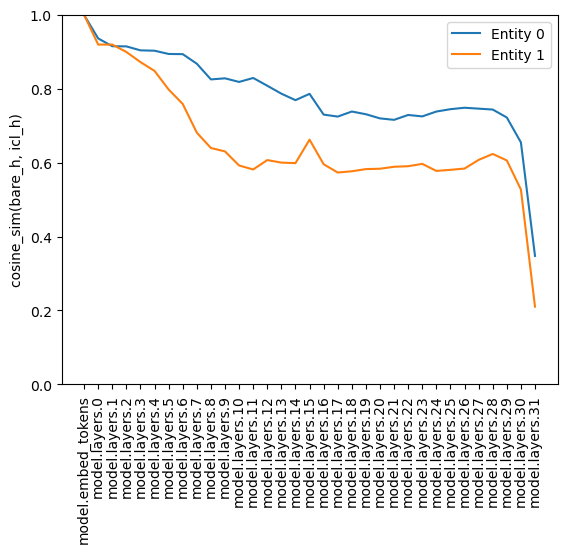

In [65]:
similarity_0 = []
similarity_1 = []

for layer in [mt.embedder_name] + mt.layer_names:
    entity_pos_0 = prompt.entity_ranges[0][1] - 1
    sim_0 = torch.cosine_similarity(
        bare_hs[0][(layer, entity_pos_0)], icl_hs[0][(layer, entity_pos_0)], dim=-1
    )

    similarity_0.append(sim_0.item())

    entity_pos_1 = prompt.entity_ranges[1][1] - 1
    sim_1 = torch.cosine_similarity(
        bare_hs[1][(layer, entity_pos_1)], icl_hs[1][(layer, entity_pos_1)], dim=-1
    )

    similarity_1.append(sim_1.item())

# print(f"{layer}: {sim_0.item()=}, {sim_1.item()=}")

from matplotlib import pyplot as plt

plt.plot(similarity_0, label="Entity 0")
plt.plot(similarity_1, label="Entity 1")

plt.legend()
plt.ylim(0, 1)
plt.ylabel("cosine_sim(bare_h, icl_h)")

plt.xticks(range(mt.n_layer + 1), [mt.embedder_name] + mt.layer_names, rotation=90)
plt.show()

### Use the corner as introspection point

2025-02-10 13:24:34 src.operators.estimators INFO     What is the nationality of X? Answer:  |>> self.placeholder_pos=7 | self.inputs['input_ids'].shape=torch.Size([1, 11])
[' British', ' American', ' French', ' German', ' Italian', ' Spanish', ' Russian', ' Chinese', ' Japanese', ' Indian']
2025-02-10 13:24:34 src.operators.estimators INFO     Initialized to [PredictedToken(token='1', prob=0.486572265625, logit=20.109375, token_id=16), PredictedToken(token='2', prob=0.168212890625, logit=19.046875, token_id=17), PredictedToken(token='3', prob=0.1036376953125, logit=18.5625, token_id=18), PredictedToken(token='10', prob=0.0445556640625, logit=17.71875, token_id=605), PredictedToken(token='4', prob=0.02423095703125, logit=17.109375, token_id=19)]


100%|██████████| 200/200 [00:17<00:00, 11.34it/s]


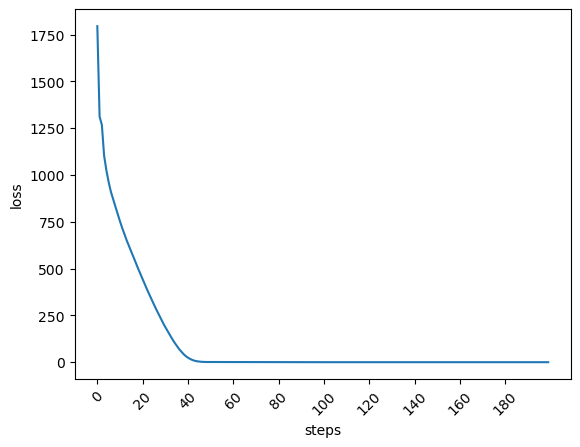

2025-02-10 13:24:52 src.operators.estimators INFO     Tuned to: [PredictedToken(token=' Japanese', prob=0.08056640625, logit=20.0, token_id=11002), PredictedToken(token=' Russian', prob=0.08056640625, logit=20.0, token_id=8690), PredictedToken(token=' Chinese', prob=0.08056640625, logit=20.0, token_id=8620), PredictedToken(token=' German', prob=0.07928466796875, logit=19.984375, token_id=6063), PredictedToken(token=' American', prob=0.07928466796875, logit=19.984375, token_id=3778)]


In [37]:
from src.operators.estimators import CornerEstimator

estimator = CornerEstimator(
    mt=mt,
    layer_name=mt.layer_names[2],
    verbose=True,
    prompt="What is the nationality of X? Answer: ",
    placeholder="X",
)

# with open(
#     os.path.join(
#         env_utils.DEFAULT_DATA_DIR,
#         "object_mappings",
#         "professions.json"
#         # "colors.json"
#     ), "r"
# ) as f:
#     objects = json.load(f)
# # objects = [f" {c}" for c in objects]
# objects = [" Christian", " Muslim", " Hindu", " Buddhist", " Sikh", " Jewish", " Atheist", " Agnostic", " Deist", " Pagan"]
# objects = [" red", " blue", " green", " yellow", " orange", " purple", " pink", " black", " white", " grey"]
objects = [
    " British",
    " American",
    " French",
    " German",
    " Italian",
    " Spanish",
    " Russian",
    " Chinese",
    " Japanese",
    " Indian",
]

token_indices = (
    mt.tokenizer(
        objects,
        add_special_tokens=False,
        return_tensors="pt",
        padding=True,
        padding_side="right",
    )
    .input_ids[:, 0]
    .tolist()
)
print([mt.tokenizer.decode(t) for t in token_indices])

corner = estimator.estimate(
    class_indices=token_indices,
    n_steps=200,
    # space="prob",
    target_val=20,
    # concept_subspace_regularizer=0.1
    weight_decay=5e-4,
)

In [66]:
placeholder_prompt.entity_ranges

((206, 207), (208, 209))

In [67]:
entities

('Rafael Nadal', 'Javier Bardem')

In [68]:
corner_pos = placeholder_prompt.entity_ranges[1][0]
entity_pos = placeholder_prompt.entity_ranges[0][0]

# corner_pos = placeholder_prompt.entity_ranges[0][0]
# entity_pos = placeholder_prompt.entity_ranges[1][0]

corner_patch = []
for layer in mt.layer_names:
    corner_patch.append(PatchSpec(location=(layer, corner_pos), patch=corner.corner))
    corner_patch.append(
        PatchSpec(
            location=(layer, entity_pos),
            patch=icl_hs[0][(layer, prompt.entity_ranges[0][1] - 1)],
            # patch = corner.corner
        )
    )


pred, track_ans = predict_next_token(
    mt=mt,
    inputs=TokenizerOutput(data=placeholder_prompt.tokenized),
    patches=corner_patch,
    k=20,
    token_of_interest=[token_indices],
)

pred

[[PredictedToken(token=' tennis', prob=0.51953125, logit=17.546875, token_id=32515),
  PredictedToken(token=' professional', prob=0.2132568359375, logit=16.65625, token_id=6721),
  PredictedToken(token=' athletes', prob=0.0212860107421875, logit=14.3515625, token_id=23579),
  PredictedToken(token=' Spanish', prob=0.0201416015625, logit=14.296875, token_id=15506),
  PredictedToken(token=' world', prob=0.016448974609375, logit=14.09375, token_id=1917),
  PredictedToken(token=' ranked', prob=0.0161895751953125, logit=14.078125, token_id=21682),
  PredictedToken(token=' active', prob=0.0141754150390625, logit=13.9453125, token_id=4642),
  PredictedToken(token=' top', prob=0.011749267578125, logit=13.7578125, token_id=1948),
  PredictedToken(token=' famous', prob=0.0088043212890625, logit=13.46875, token_id=11495),
  PredictedToken(token=' number', prob=0.00873565673828125, logit=13.4609375, token_id=1396),
  PredictedToken(token=' players', prob=0.007648468017578125, logit=13.328125, token

In [71]:
from src.functional import logit_lens

logit_lens(
    mt=mt,
    h=bare_hs[0][(mt.layer_names[25], prompt.entity_ranges[0][1] - 1)],
    interested_tokens=token_indices,
)

([PredictedToken(token=' Rafael', prob=0.06689453125, logit=10.5859375, token_id=55500),
  PredictedToken(token=' ATP', prob=0.0643310546875, logit=10.546875, token_id=67656),
  PredictedToken(token=' Roland', prob=0.028564453125, logit=9.734375, token_id=58906),
  PredictedToken(token=' tennis', prob=0.021392822265625, logit=9.4453125, token_id=32515),
  PredictedToken(token=' Wimbledon', prob=0.0208892822265625, logit=9.421875, token_id=91257)],
 {15506: (36,
   PredictedToken(token=' Spanish', prob=0.0016050338745117188, logit=6.85546875, token_id=15506)),
  8753: (167,
   PredictedToken(token=' French', prob=0.00035953521728515625, logit=5.359375, token_id=8753)),
  7904: (1637,
   PredictedToken(token=' Indian', prob=5.632638931274414e-05, logit=3.505859375, token_id=7904)),
  6063: (3358,
   PredictedToken(token=' German', prob=3.0875205993652344e-05, logit=2.904296875, token_id=6063)),
  15155: (4648,
   PredictedToken(token=' Italian', prob=2.3066997528076172e-05, logit=2.61328